### 베르누이 분포

#### intro

**비모수적 기법**

모집단의 확률 분포에 대한 특별한 가정없이, 평균과 분산이라는 지표를 추정

**모수적 기법**

모집단의 성질에 따라 확률 분포의 형태인지를 미리 가정한 후, 기댓값 혹은 분산을 결정하는 소수의 파라미터 추정

<br>

#### 정의와 특징

- 가장 기본적인 이산형 확률 분포

- 변수의 확률값이 동일

- 성공/실패와 같이 두 가지에 대한 분포로 성공확률p, 실패확률 1-p가 있는 분포

- 취할 수 있는 값은 0(실패) 혹은 1(성공)

- 1과 0이 나올 확률을 각각 더하면 1이 되어야하므로, 그 확률을 각각 p와 1-p로 정의

- 0<=p<=1이라는 조건 만족(확률의 성질에 따라)

- 베르누이 분포를 Bern(p)로 표기

- 확률함수 공식

   - f(x) = p^x(1-p)^(1-x) {x is 0 or 1}

   - f(x) = 0 (otherwise)

- X ~ Bern(p)

   - E(X) = p

   - V(x) = p(1-p)

In [3]:
import numpy as  np #분포 구현
import matplotlib.pyplot as plt
from scipy import stats #통계 계산

%precision 3
%matplotlib inline

In [8]:
#E(X)

def E(X, g=lambda x: x):
    x_set, f = X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

In [9]:
#V(X)

def V(X, g=lambda x:x):
    x_set, f =X
    mean = E(X,g)
    return np.sum([(g(x_k)-mean)**2 * f(x_k) for x_k in x_set])

In [38]:
#Check_prob
def check_prob(X):
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    assert np.all(prob >=0), 'minus probability'
    prob_sum = np.round(np.sum(prob), 6)
    assert prob_sum ==1, 'sum of probability'
    print(f'expected value {E(X):.4}')
    print(f'variance {(V(X)):.4}')

In [12]:
#plot_prob
def plot_prob(X):
    x_set, f=X
    prob = np.array([f(x_k) for x_k in x_set])

    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(111)
    ax.bar(x_set, prob, label = 'prob')
    ax.vlines(E(X), 0, 1, label = 'mean')
    ax.set_xticks(np.append(x_set, E(X)))
    ax.set_ylim(0, prob.max()*1.2)
    ax.legend()

    plt.show()

In [5]:
def Bern(p):
    x_set = np.array([0,1])
    def f(x):
        if x in x_set:
            return p ** x * (1-p) **(1-x)
        else:
            return 0
    return x_set,f

In [6]:
p=0.3
X = Bern(p)

In [11]:
check_prob(X)

expected value 0.3
variance 0.21


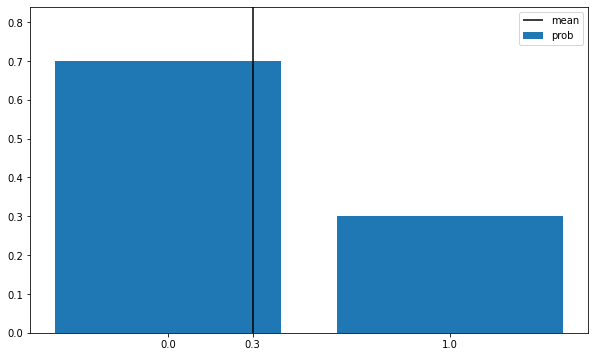

In [13]:
plot_prob(X)

In [14]:
rv = stats.bernoulli(p)
#확률변수 호출

In [15]:
rv.pmf(0), rv.pmf(1)

(0.700, 0.300)

In [16]:
rv.pmf([0,1]) #확률질량함수(pmf)계산

array([0.7, 0.3])

In [17]:
rv.cdf([0,1]) # 누적분포함수(cdf) 계산

array([0.7, 1. ])

In [18]:
rv.mean(), rv.var()

(0.300, 0.210)

---


### 이항 분포(Binomial Distribution)

- 성공 확률이 p인 베르누이 시행을 n번 했을 때의 성공 횟수를 나타내는 분포

- 취할 수 있는 값: [0,1,...,n]

- 파라미터: 성공확률 p, 시행 횟수 n

- 0<=p<=1, n은 1이상인 정수라는 조건을 만족해야한다

- Bin(n,p)로 표기

- 확률함수 공식

   - f(x) = (n x)p^x(1-p)^(n-x) {x is in [0,1,..n]}

   - f(x) = 0 (otherwise)

- 이항 분포 기댓값과 분산

   - E(X) =np

   - V(X) = np(1-p)

In [19]:
from scipy.special import comb # comb함수를 통해서 (n x)구현

def Bin(n,p):
    x_set = np.arange(n+1)
    def f(x):
        if x in x_set:
            return comb(n,x) * p**x * (1-p)**(n-x)
        else:
            return 0
    return x_set, f

In [20]:
n = 10
p = 0.3
X = Bin(n,p)

check_prob(X)

expected value 3.0
variance 2.1


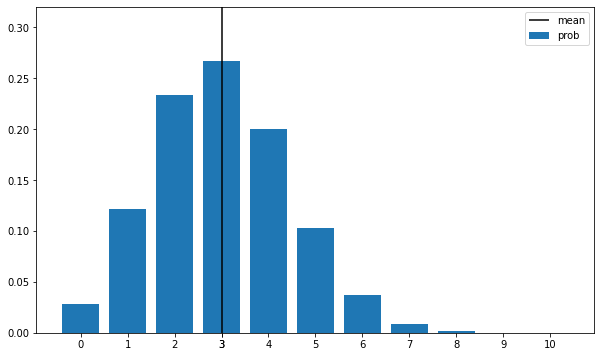

In [21]:
plot_prob(X)

In [ ]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

x_set = np.arange(n+1)
for p, ls in zip([0.3, 0.5, 0.7],linestyles ):
    rv = stats.binom(n, p)
    ax.plot(x_set, rv.pmf(x_set),
            label=f'p:{p}', ls=ls, color='gray')
ax.set_xticks(x_set)
ax.legend()

plt.show()

---

### 기하 분포(Geometric Distribution)

- 베르누이 시행에서 처음 성공할 때까지 반복한 시행 횟수에 따른 분포

- 취할 수 있는 값:{1,2,3,...}

- 파라미터: 성공 확률 p

- 0<=p<=1라는 조건 만족

- Ge(p)로 표기

- 공식

   - f(x) = (1-p)^(x-1)p. {x is [1,2,3,4,5...]}

   - f(x) = 0 (otherwise)

- 기대값과 분산

   - E(X) = 1/p

   - V(X) = (1-p) / p^2

In [26]:
def Ge(p):
    x_set = np.arange(1,30)
    def f(x):
        if x in x_set:
            return p * (1-p) ** (x-1)
        else:
            return 0
    return x_set, f

In [27]:
p = 0.5
X = Ge(p)

In [28]:
check_prob(X)

expected value 2.0
variance 2.0


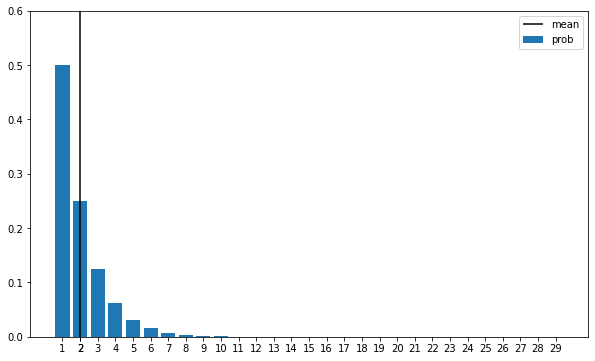

In [29]:
plot_prob(X)

---

### 푸아송 분포(Possion Distribution)

- 임의의 사건이 단위 시간당 발생하는 건수에 따른 확률분포

- 취할 수 있는 값: {0,1,2,3,...}

- 파라미터: a(lambda)는 양의 실수

- Poi(a)로 표기

- 확률함수 공식

   - f(x) = (a^x * e^-a) / x!  {x is [0,1,2,3,,..]}

   - f(x) = 0 (otherwise)


- 기대값과 분산

   - E(X) = a

   - V(X) = a

In [35]:
from scipy.special import factorial # x! 구현

def Poi(lam):
    x_Set = np.arange(20)
    def f(x):
        if x in x_set:
            return np.power(lam, x) / factorial(x) * np.exp(-lam)
        else:
            return 0
    return x_set, f

In [36]:
lam = 3

X = Poi(lam)





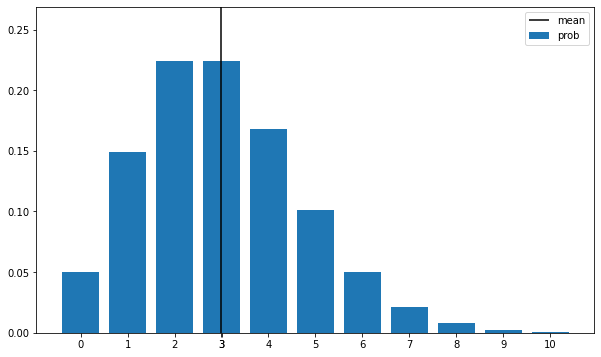

In [40]:
plot_prob(X)